<h1><b>Music Recommendation System Using Spotify Dataset</b></h1>


<h1>PART 1: DATASET DESCRIPTION</h1>

<h2>Problem Statement:</h2>

<p>The dataset used for this project is sourced from Kaggle and contains various attributes related to songs and their characteristics on the Spotify platform. The primary objective for this dataset is to build a recommendation engine that can analyze and understand the factors contributing to the popularity and user engagement of songs on Spotify. This recommendation engine aims to provide personalized song recommendations to users based on their preferences, ultimately enhancing the user experience on the platform.</p>
<h2>Source of the Dataset:</h2>

<p>The dataset was obtained from Kaggle, a well-known platform for sharing and discovering datasets. Kaggle sourced the data from Spotify, a popular music streaming service. Using data from Spotify ensures that the dataset contains real-world information about songs available on the platform, making it valuable for building a music recommendation system.</p>
<h2>Brief Description of the Dataset:</h2>

<p>The dataset obtained from Kaggle consists of information about songs available on Spotify. Each row in the dataset represents a unique song. The dataset comprises 14 columns, each representing different attributes or variables related to these songs.</p>
<h2>Description of the Attributes/Variables/Columns of the Dataset:</h2>

<ol>
  <li><strong>artists:</strong> This column contains the names of the artists associated with the songs. It is of data type object.</li>
  <li><strong>acousticness:</strong> This column represents the acousticness of the songs, measured as a float value. Acousticness refers to the extent to which a song is acoustic in nature, with values closer to 1 indicating a more acoustic sound.</li>
  <li><strong>danceability:</strong> This column represents the danceability of the songs, measured as a float value. Danceability indicates how suitable a song is for dancing, with higher values indicating songs that are easier to dance to.</li>
  <li><strong>energy:</strong> This column represents the energy level of the songs, measured as a float value. Energy indicates the intensity and activity of a song, with higher values indicating more energetic songs.</li>
  <li><strong>id:</strong> This column contains unique identifiers for the songs. It is of data type object.</li>
  <li><strong>instrumentalness:</strong> This column represents the instrumentalness of the songs, measured as a float value. Instrumentalness indicates the extent to which a song contains no vocals, with values closer to 1 indicating purely instrumental songs.</li>
  <li><strong>key:</strong> This column represents the key of the songs, measured as an integer. The key is a musical attribute that determines the overall pitch and tonality of a song.</li>
  <li><strong>liveness:</strong> This column represents the liveness of the songs, measured as a float value. Liveness indicates whether a song was recorded live, with higher values indicating a live recording.</li>
  <li><strong>loudness:</strong> This column represents the loudness of the songs, measured as a float value. Loudness refers to the overall volume of a song, with negative values indicating quieter songs.</li>
  <li><strong>mode:</strong> This column represents the mode of the songs, measured as a float value. Mode indicates whether a song is in a major or minor key.</li>
  <li><strong>name:</strong> This column contains the names of the songs. It is of data type object.</li>
  <li><strong>speechiness:</strong> This column represents the speechiness of the songs, measured as a float value. Speechiness indicates the presence of spoken words in a song, with higher values indicating more speech-like content.</li>
  <li><strong>tempo:</strong> This column represents the tempo (beats per minute) of the songs, measured as a float value.</li>
  <li><strong>valence:</strong> This column represents the valence of the songs, measured as a float value. Valence indicates the positivity or happiness of a song, with higher values indicating more positive or happy songs.</li>
</ol>

<h1>PART 2: DATA WRANGLING, PREPROCESSING AND TRANSFORMATION</h1>

In [40]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [41]:
#TWO DATASETs OF SONGS

#Dataset Contains [Mostly English and Other Songs]
dataset1 = pd.read_csv("./data.csv")

#Dataset Contains the information of genres (Classification of different attributes of Audio Song into Respective genres)
genres = pd.read_csv("./data_by_genres.csv")

#Dataset Contains [Indian Songs]
dataset2 = pd.read_csv("./SingerAndSongs.csv")

genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [42]:
#As Dataset is huge (Fetching the desired sample by filtering on time and popularity)
#Filtering
dataset1 = dataset1[dataset1['year'] >= 2000]
dataset1 = dataset1[dataset1['popularity']>=60]

#Renaming Dataset2
dataset2 = dataset2.rename(columns={'Singer': 'artists', 'Song name': 'name'})

#Dropping Redundant Columns
dataset2= dataset2.drop(['track_href'], axis=1)

#Renaming Dataset1
dataset1 = dataset1[['artists','acousticness','danceability','energy','id','instrumentalness','key','liveness','loudness','mode','name','speechiness','tempo','valence']]

In [43]:
dataset1.head()

,artists,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence
15606,['Coldplay'],0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,0.0281,173.372,0.285
15607,['OutKast'],0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,0.2690,94.948,0.613
15608,['Linkin Park'],0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,0.0584,105.143,0.400
15609,['3 Doors Down'],0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,0.0286,99.009,0.543
15610,['Eminem'],0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,0.0572,104.504,0.760


<h6><b>Categorical Data : </b></h6>
<ul>
<li>Artists</li>
</ul>
<h6><b>Numerical Data : </b></h6>
<ul>
<li>Acousticness</li>
<li>energy</li>
<li>instrumentalness</li>
<li>key</li>
<li>liveness</li>
<li>loudness</li>
<li>mode</li>
<li>tempo</li>
<li>valence</li>
<li>danceability</li>
<li>Speechiness</li>
</ul>

<h6><b>Columns that do not participate in Analysis :</b></h6>
<ul>
<li>Song Name</li>
</ul>



In [44]:
songs = pd.concat([dataset1,dataset2],axis=0)

In [45]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16077 entries, 15606 to 2230
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           16077 non-null  object 
 1   acousticness      16077 non-null  float64
 2   danceability      16077 non-null  float64
 3   energy            16077 non-null  float64
 4   id                16077 non-null  object 
 5   instrumentalness  16077 non-null  float64
 6   key               16077 non-null  int64  
 7   liveness          16077 non-null  float64
 8   loudness          16077 non-null  float64
 9   mode              16077 non-null  int64  
 10  name              16076 non-null  object 
 11  speechiness       16077 non-null  float64
 12  tempo             16077 non-null  float64
 13  valence           16077 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.8+ MB


<h1><b>1. Data cleaning:</b></h1>

<h6>Missing Values</h6>

In [46]:
#Missing Values
missing_values = songs.isnull().sum()
print(missing_values)

artists             0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                1
speechiness         0
tempo               0
valence             0
dtype: int64


In [47]:
# As the count for missing value is only ONE (The Most Suitable technique to remove nulls is to remove the entire row)
songs= songs.dropna()
missing_values = songs.isnull().sum()
print(missing_values)
songs.info()

artists             0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
speechiness         0
tempo               0
valence             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16076 entries, 15606 to 2230
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           16076 non-null  object 
 1   acousticness      16076 non-null  float64
 2   danceability      16076 non-null  float64
 3   energy            16076 non-null  float64
 4   id                16076 non-null  object 
 5   instrumentalness  16076 non-null  float64
 6   key               16076 non-null  int64  
 7   liveness          16076 non-null  float64
 8   loudness          16076 non-null  float64
 9   mode              16076 non-null  int64  
 10

<h6>Duplicate Values</h6>

In [48]:
#Removing the Duplicates
songs = songs.drop_duplicates()
songs = songs.reset_index()
songs.to_csv("songs.csv")

<h1>Dimentiality Reduction</h1>

In [49]:
songs.info()
songs['artists'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16012 entries, 0 to 16011
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             16012 non-null  int64  
 1   artists           16012 non-null  object 
 2   acousticness      16012 non-null  float64
 3   danceability      16012 non-null  float64
 4   energy            16012 non-null  float64
 5   id                16012 non-null  object 
 6   instrumentalness  16012 non-null  float64
 7   key               16012 non-null  int64  
 8   liveness          16012 non-null  float64
 9   loudness          16012 non-null  float64
 10  mode              16012 non-null  int64  
 11  name              16012 non-null  object 
 12  speechiness       16012 non-null  float64
 13  tempo             16012 non-null  float64
 14  valence           16012 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.8+ MB


['BTS']                                        110
['One Direction']                               89
['Taylor Swift']                                85
Arijit Singh                                    84
['Drake']                                       71
                                              ... 
['Jay Wheeler', 'DJ Nelson', 'Myke Towers']      1
['Lele Pons', 'Guaynaa']                         1
['WhoHeem']                                      1
['Blanco Brown']                                 1
['The Struts']                                   1
Name: artists, Length: 6623, dtype: int64

In [50]:
#Dimentiality Reduction
songs = songs.drop(['name'], axis=1)
songs = songs.drop(['index'], axis=1)
genres = genres.drop(['genres'],axis=1)


In [51]:
# Assuming 'df' is your DataFrame with 'artist' and 'name' columns
# First, create a count of songs per artist
artist_song_counts = songs['artists'].value_counts()

# Identify artist names with fewer than 20 songs
artists_to_remove = artist_song_counts[artist_song_counts < 3].index

# Remove rows with artist names having fewer than 20 songs
songs = songs[~songs['artists'].isin(artists_to_remove)]

# Reset the index if needed
songs.reset_index(drop=True, inplace=True)



In [52]:
songs.info()
songs['artists'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9580 entries, 0 to 9579
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           9580 non-null   object 
 1   acousticness      9580 non-null   float64
 2   danceability      9580 non-null   float64
 3   energy            9580 non-null   float64
 4   id                9580 non-null   object 
 5   instrumentalness  9580 non-null   float64
 6   key               9580 non-null   int64  
 7   liveness          9580 non-null   float64
 8   loudness          9580 non-null   float64
 9   mode              9580 non-null   int64  
 10  speechiness       9580 non-null   float64
 11  tempo             9580 non-null   float64
 12  valence           9580 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 973.1+ KB


['BTS']                      110
['One Direction']             89
['Taylor Swift']              85
Arijit Singh                  84
['Drake']                     71
                            ... 
['Rihanna', 'Mikky Ekko']      3
['gianni & kyle']              3
['UMI']                        3
['Nature Sounds']              3
['Incubus']                    3
Name: artists, Length: 995, dtype: int64

In [53]:
songs.head()

,artists,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,['Coldplay'],0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,0.0281,173.372,0.285
1,['OutKast'],0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,0.2690,94.948,0.613
2,['Linkin Park'],0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,0.0584,105.143,0.400
3,['3 Doors Down'],0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,0.0286,99.009,0.543
4,['Eminem'],0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,0.0572,104.504,0.760


<h1><b>2. Data Validation</b></h1>

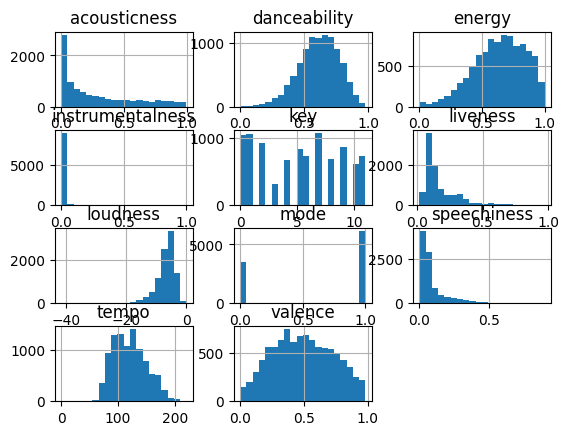

In [54]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
songs.hist(bins=20)
plt.show()

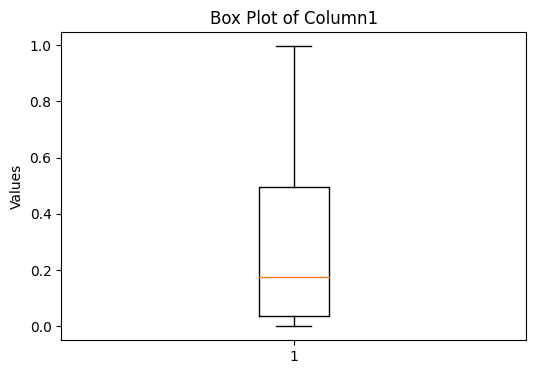

In [55]:
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(songs['acousticness'])
plt.title('Box Plot of Column1')
plt.ylabel('Values')
plt.show()


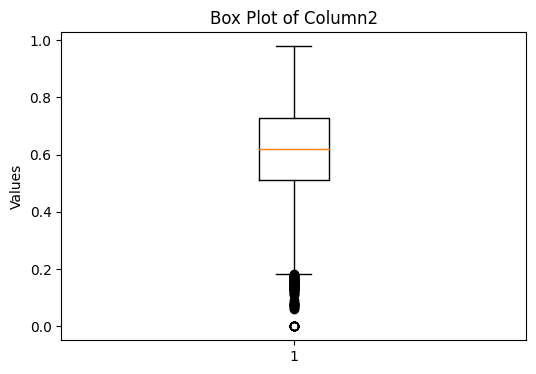

In [56]:
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(songs['danceability'])
plt.title('Box Plot of Column2')
plt.ylabel('Values')
plt.show()


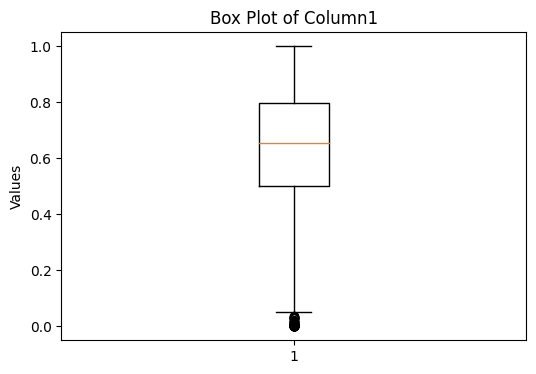

In [57]:
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(songs['energy'])
plt.title('Box Plot of Column1')
plt.ylabel('Values')
plt.show()


Diverse Musical Genres: The presence of outliers in various audio features is a natural becuase of a wide range of musical genres. Different genres exhibit distinct musical characteristics, resulting in variations in acousticness, danceability, energy, and other attributes. Thus, outliers are common as they reflect the diversity of musical expressions across genres.


"This data comes from Spotify, a big and trusted music company. So, it's real and reliable."


<h1><b>3. Data Transformation</b></h1>

<h6>Hot Encoding</h6>

In [58]:
# Perform one-hot encoding on the 'artist' column
artist_encoded = pd.get_dummies(songs['artists'])

# Concatenate the one-hot encoded columns with the original DataFrame
songs = pd.concat([songs, artist_encoded], axis=1)

# Drop the original 'artist' column as it's no longer needed
songs = songs.drop('artists', axis=1)


In [59]:
songs.head()

,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,...,['j-hope'],['jxdn'],['keshi'],['khai dreams'],['mike.'],['mxmtoon'],['potsu'],['ppcocaine'],"['prxz', 'Shiloh Dynasty']",['tobi lou']
0,0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,0.0281,...,0,0,0,0,0,0,0,0,0,0
1,0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,0.2690,...,0,0,0,0,0,0,0,0,0,0
2,0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,0.0584,...,0,0,0,0,0,0,0,0,0,0
3,0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,0.0286,...,0,0,0,0,0,0,0,0,0,0
4,0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,0.0572,...,0,0,0,0,0,0,0,0,0,0


In [60]:
new_column_order = ['id'] + [col for col in songs.columns if col != 'id']
# Rearrange the columns in the DataFrame
songs = songs[new_column_order]

In [61]:
songs.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,['j-hope'],['jxdn'],['keshi'],['khai dreams'],['mike.'],['mxmtoon'],['potsu'],['ppcocaine'],"['prxz', 'Shiloh Dynasty']",['tobi lou']
0,3AJwUDP919kvQ9QcozQPxg,0.00239,0.429,0.661,0.000121,11,0.2340,-7.227,1,0.0281,...,0,0,0,0,0,0,0,0,0,0
1,0I3q5fE6wg7LIfHGngUTnV,0.14300,0.843,0.806,0.000000,4,0.0771,-5.946,0,0.2690,...,0,0,0,0,0,0,0,0,0,0
2,60a0Rd6pjrkxjPbaKzXjfq,0.00958,0.556,0.864,0.000000,3,0.2090,-5.870,0,0.0584,...,0,0,0,0,0,0,0,0,0,0
3,6ZOBP3NvffbU4SZcrnt1k6,0.00664,0.545,0.865,0.000011,11,0.1680,-5.708,0,0.0286,...,0,0,0,0,0,0,0,0,0,0
4,3yfqSUWxFvZELEM4PmlwIR,0.03020,0.949,0.661,0.000000,5,0.0454,-4.244,0,0.0572,...,0,0,0,0,0,0,0,0,0,0


<h1><b>4. Standardization</b></h1>

In [62]:
# Separate the first column (e.g., 'id') from the rest
first_column = songs.iloc[:, 0]
rest_of_columns = songs.iloc[:, 1:]

# Standardize the remaining columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(rest_of_columns)

# Create a new DataFrame with the standardized values
standardized_df = pd.DataFrame(standardized_data, columns=rest_of_columns.columns)

# Combine the first column and the standardized data
result_df = pd.concat([first_column, standardized_df], axis=1)

In [63]:
scaler = StandardScaler()
# Standardize all numerical columns in the DataFrame
genres_scaled = pd.DataFrame(scaler.fit_transform(genres), columns=genres.columns)
genres_scaled.head()


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,0.447484,1.808197,-2.484719,-0.966000,-2.089283,1.479575,1.828029,-3.912689,-0.534628,-2.500950,-1.927609,-0.721720,0.018179
1,0.447484,0.292578,-1.578931,8.423062,-0.471170,0.996674,-0.669260,-1.181781,-0.084146,0.072537,-1.342996,0.751277,-0.278774
2,0.447484,1.128407,1.160449,-1.442757,1.095589,2.486616,-0.723408,0.247722,-0.454680,0.825894,2.389920,0.482555,0.315131
3,0.447484,0.782518,-0.053735,-0.199068,-0.605666,-0.022662,0.280445,-0.331412,0.301775,-0.352759,0.103360,-1.138147,0.315131
4,0.447484,0.861153,0.011776,-0.645517,-1.043772,-0.779555,-0.222497,-0.366883,-0.009152,-0.395526,-0.220526,0.352378,0.315131


In [64]:
result_df.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,['j-hope'],['jxdn'],['keshi'],['khai dreams'],['mike.'],['mxmtoon'],['potsu'],['ppcocaine'],"['prxz', 'Shiloh Dynasty']",['tobi lou']
0,3AJwUDP919kvQ9QcozQPxg,-0.976669,-1.150894,0.119240,-0.221413,1.625739,0.362767,-0.068047,0.752925,-0.651434,...,-0.017699,-0.020438,-0.027041,-0.025034,-0.017699,-0.017699,-0.020438,-0.017699,-0.017699,-0.020438
1,0I3q5fE6wg7LIfHGngUTnV,-0.496799,1.460333,0.825870,-0.222272,-0.351878,-0.731204,0.278447,-1.328154,1.882155,...,-0.017699,-0.020438,-0.027041,-0.025034,-0.017699,-0.017699,-0.020438,-0.017699,-0.017699,-0.020438
2,60a0Rd6pjrkxjPbaKzXjfq,-0.952131,-0.349865,1.108522,-0.222272,-0.634394,0.188457,0.299004,-1.328154,-0.332763,...,-0.017699,-0.020438,-0.027041,-0.025034,-0.017699,-0.017699,-0.020438,-0.017699,-0.017699,-0.020438
3,6ZOBP3NvffbU4SZcrnt1k6,-0.962165,-0.419246,1.113395,-0.222194,1.625739,-0.097412,0.342823,-1.328154,-0.646175,...,-0.017699,-0.020438,-0.027041,-0.025034,-0.017699,-0.017699,-0.020438,-0.017699,-0.017699,-0.020438
4,3yfqSUWxFvZELEM4PmlwIR,-0.881760,2.128908,0.119240,-0.222272,-0.069361,-0.952229,0.738816,-1.328154,-0.345384,...,-0.017699,-0.020438,-0.027041,-0.025034,-0.017699,-0.017699,-0.020438,-0.017699,-0.017699,-0.020438


In [65]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9580 entries, 0 to 9579
Columns: 1007 entries, id to ['tobi lou']
dtypes: float64(1006), object(1)
memory usage: 73.6+ MB


In [66]:
result_df.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,['j-hope'],['jxdn'],['keshi'],['khai dreams'],['mike.'],['mxmtoon'],['potsu'],['ppcocaine'],"['prxz', 'Shiloh Dynasty']",['tobi lou']
count,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,...,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03,9.580000e+03
mean,-1.780065e-17,3.411792e-16,1.898736e-16,-3.560131e-17,3.560131e-17,-1.112541e-16,-2.521759e-17,7.120261e-17,-7.120261e-17,1.364717e-16,...,3.708469e-18,-1.112541e-18,1.483388e-18,-1.483388e-18,2.966776e-18,2.966776e-18,8.529480e-18,2.225082e-18,2.966776e-18,5.562704e-18
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,...,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-9.848256e-01,-3.856731e+00,-3.101920e+00,-2.222722e-01,-1.481944e+00,-1.136301e+00,-9.410396e+00,-1.328154e+00,-9.469667e-01,-4.079657e+00,...,-1.769888e-02,-2.043798e-02,-2.704114e-02,-2.503392e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02
25%,-8.616245e-01,-6.400017e-01,-6.702366e-01,-2.222722e-01,-9.169111e-01,-5.966365e-01,-3.285933e-01,-1.328154e+00,-5.767620e-01,-7.973561e-01,...,-1.769888e-02,-2.043798e-02,-2.704114e-02,-2.503392e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02
50%,-3.875901e-01,6.010994e-02,8.999991e-02,-2.222598e-01,-6.936109e-02,-4.181428e-01,1.951371e-01,7.529247e-01,-4.169008e-01,-2.003753e-02,...,-1.769888e-02,-2.043798e-02,-2.704114e-02,-2.503392e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02
75%,7.113233e-01,7.349923e-01,7.881017e-01,-2.209146e-01,7.781889e-01,3.069879e-01,5.814601e-01,7.529247e-01,7.872132e-02,6.581898e-01,...,-1.769888e-02,-2.043798e-02,-2.704114e-02,-2.503392e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02,-1.769888e-02,-1.769888e-02,-2.043798e-02
max,2.414298e+00,2.318128e+00,1.766419e+00,6.876211e+00,1.625739e+00,5.508406e+00,1.887574e+00,7.529247e-01,8.455393e+00,3.367166e+00,...,5.650074e+01,4.892852e+01,3.698069e+01,3.994580e+01,5.650074e+01,5.650074e+01,4.892852e+01,5.650074e+01,5.650074e+01,4.892852e+01


<h1><b>DATA VALIDITY</b></h1>

In [67]:
result_df.rename(columns={'[\'Joey Bada$$\']': 'Joey BadaSS'}, inplace=True)
result_df.to_csv("Songs_scaled.csv")
genres_scaled.to_csv("Genres_scaled.csv")